In [1]:
pip install python-bcb

   ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
   -------------------------------------- - 3.9/4.1 MB 36.6 MB/s eta 0:00:01
   ---------------------------------------- 4.1/4.1 MB 28.4 MB/s  0:00:00

   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 2/2 [python-bcb]

Note: you may need to restart the kernel to use updated packages.


In [1]:
from bcb import sgs
import pandas as pd

In [2]:
df_bcb = sgs.get({'selic': 432, 'ipca': 433}, start='2016-01-01', end='2018-12-31')

In [3]:
print(df_bcb.head())

            selic  ipca
Date                   
2016-01-01  14.25  1.27
2016-01-02  14.25   NaN
2016-01-03  14.25   NaN
2016-01-04  14.25   NaN
2016-01-05  14.25   NaN


In [4]:
df_bcb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2016-01-01 to 2018-12-31
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   selic   1096 non-null   float64
 1   ipca    36 non-null     float64
dtypes: float64(2)
memory usage: 25.7 KB


In [ ]:
df_bcb['ipca'].isnull().any() 

np.True_

In [ ]:
df_bcb.index = pd.to_datetime(df_bcb.index) # garantir que Index seja um datetime
df_bcb.index.name = 'Date'

In [19]:
df_bcb_mensal = df_bcb.resample('ME').agg({'selic': 'mean', 'ipca': 'last'})

In [21]:
df_bcb_mensal.head()

,selic,ipca
Date,,
2016-01-31,14.25,1.27
2016-02-29,14.25,0.90
2016-03-31,14.25,0.43
2016-04-30,14.25,0.61
2016-05-31,14.25,0.78


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
PALETA_OLIST = ["#0047bb", "#94a3b8", "#1e293b", "#3b82f6", "#e2e8f0"]
sns.set_theme(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=PALETA_OLIST)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'

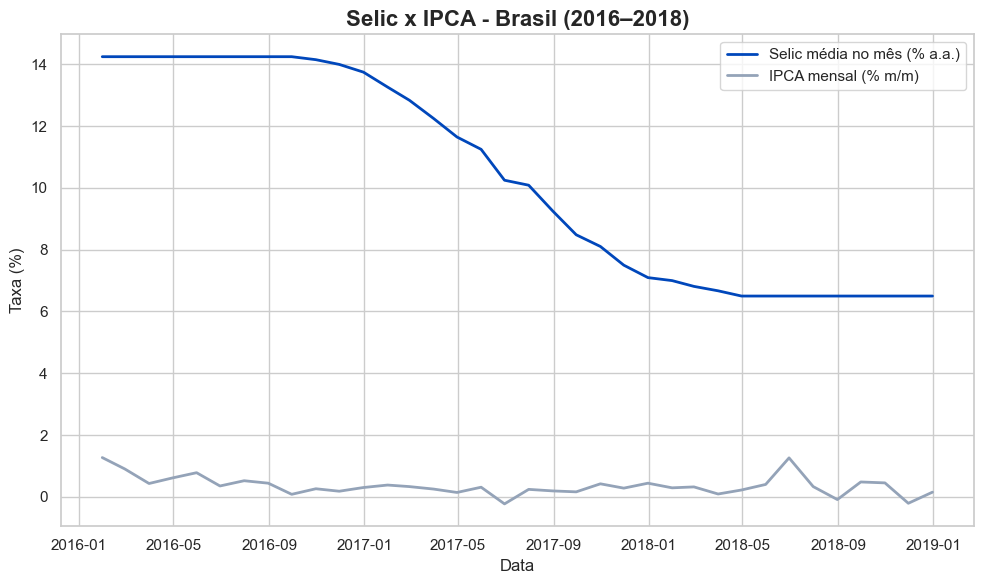

In [23]:
plt.plot(df_bcb_mensal.index, df_bcb_mensal['selic'], label='Selic média no mês (% a.a.)', linewidth=2)
plt.plot(df_bcb_mensal.index, df_bcb_mensal['ipca'],  label='IPCA mensal (% m/m)', linewidth=2)

plt.title('Selic x IPCA - Brasil (2016–2018)')
plt.xlabel('Data')
plt.ylabel('Taxa (%)')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
lags = [0, 3, 6, 12, 18, 24]

correlacoes = {}
for lag in lags:
    # Selic(t) vs IPCA(t + lag)
    corr = df_bcb_mensal['selic'].corr(df_bcb_mensal['ipca'].shift(-lag))
    correlacoes[lag] = corr

corr_series = pd.Series(correlacoes)

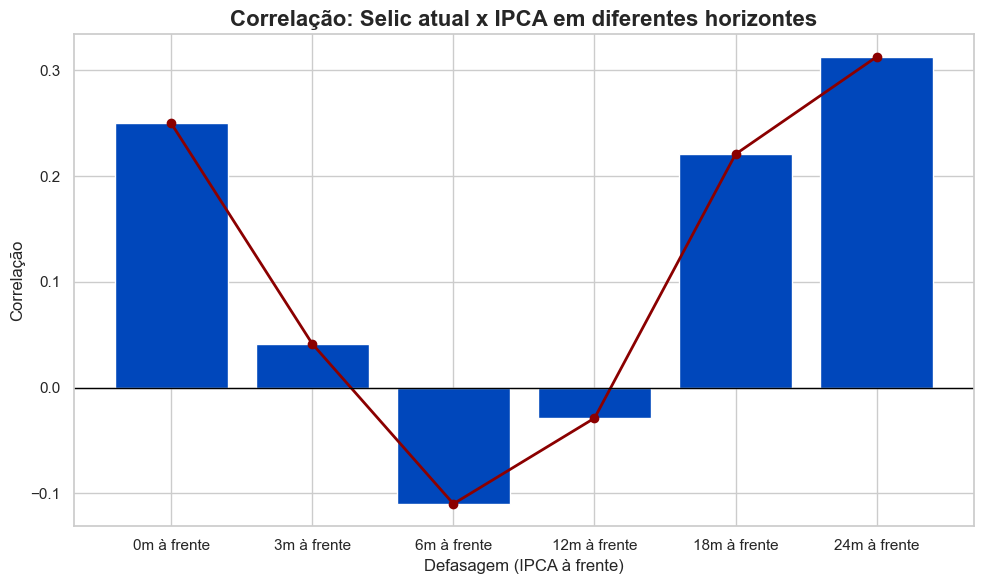

In [27]:
plt.bar(
    x=range(len(corr_series)),
    height=corr_series.values,
)

plt.plot(
    range(len(lags)),
    corr_series.values,
    color='darkred',
    marker='o',
    linewidth=2,
    label='Tendência'
)
plt.xticks(
    ticks=range(len(corr_series)),
    labels=[f'{lag}m à frente' for lag in corr_series.index]
)

plt.axhline(0, color='black', linewidth=1)
plt.title('Correlação: Selic atual x IPCA em diferentes horizontes')
plt.xlabel('Defasagem (IPCA à frente)')
plt.ylabel('Correlação')
plt.tight_layout()
plt.show()